Homework 4: Sentiment Analysis - Task 3
----

Names
----
Names: __YOUR NAMES HERE__ (Write these in every notebook you submit.)

Task 3: Train a Logistic Regression Model (20 points)
----

Using `sklearn`'s implementation of `LogisticRegression`, conduct a similar analysis on the performance of a Logistic Regression classifier on the provided data set.

Using the `time` module, you'll compare and contrast how long it takes your **home-grown BoW vectorizing function vs. `sklearn`'s `CountVectorizer`.**

You will be implementing **multinomial** (counts of word) BoW representations of your data

Logistic regression is used for binary classification, but can be extended for multi-class classification

Read more about logistic regression here - https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/.

Recall from task 2 what binarized and multinomial mean here: a __binarized__ bag of words representation is one where we put 1 [true] if the word is there and 0 [false] otherwise, and a __multinomial__ bag of words representation is one where we put the count of the word if the word occurs, and 0 otherwise.



**10 points in Task 5 will be allocated for all 9 graphs (including the one generated here in Task 3 for Logistic Regression) being:**
- Legible
- Present below
- Properly labeled
     - x and y axes labeled
     - Legend for accuracy measures plotted
     - Plot Title with which model and run number the graph represents


In [63]:
from sklearn.linear_model import LogisticRegression
# 自定义向量化：先用 featurize 得到“特征字典”，再用 DictVectorizer 得到稀疏矩阵
from sklearn.feature_extraction import DictVectorizer
# CountVectorizer 版本（支持 binary=True 二值化；支持固定 vocabulary 以复用词表）
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from collections import Counter
import time
import numpy as np
import sentiment_utils as sutils

In [64]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE   = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
# train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
# dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

train_X, train_y = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_X,   dev_y   = sutils.generate_tuples_from_file(DEV_FILE)

# some variables you may want to use
# BINARIZED = True
# USE_COUNT_VECTORIZER = False

In [65]:
# Write the functions needed (here or in sentiment_utils.py) to create vectorized BoW representations
# of your data. We recommend starting with a multinomial BoW representation.
# Each training example should be represented as a sparse vector.
# 基于训练集构建词表（可将 min_freq 调高以做停用/低频裁剪）
vocab = sutils.create_index(train_X, min_freq=1)

def vectorize_custom(X_tok, vocab, binary=False):
    feats = sutils.featurize(vocab, X_tok, binary=binary)   # List[Dict[token,value]]
    dv = DictVectorizer(sparse=True)
    X = dv.fit_transform(feats)
    return X, dv

def vectorize_cv(X_tok, binary=False, vocabulary=None):
    docs = [" ".join(toks) for toks in X_tok]
    cv = CountVectorizer(binary=binary, vocabulary=vocabulary)
    X = cv.fit_transform(docs) if vocabulary is None else cv.transform(docs)
    return X, cv

In [66]:
# how much time does it take to featurize the all data with your implementation?

start = time.time()


# YOUR CODE HERE
# 这里以“多项式（计数）BoW”为例（符合 Task 3 的推荐起点）
# 如果你想测试二值，把 binary=False 改成 True 即可
X_custom_train, dv = vectorize_custom(train_X, vocab, binary=False)


end = time.time()
print("That took:", end - start, "seconds")
print("Custom vocab size:", len(dv.feature_names_))




That took: 0.24656414985656738 seconds
Custom vocab size: 27132


In [67]:
# how much time does it take to featurize the all data with sklearn's CountVectorizer?

start = time.time()


# YOUR CODE HERE
X_cv_train, cv = vectorize_cv(train_X, binary=False)


end = time.time()
print("That took:", end - start, "seconds")
print("CountVectorizer vocab size:", len(cv.vocabulary_))

That took: 0.17239975929260254 seconds
CountVectorizer vocab size: 22596


1. How big is your vocabulary using your vectorization function(s)? __YOUR ANSWER HERE__
2. How big is your vocabulary using the `CountVectorizer`? __YOUR ANSWER HERE__

In [68]:
#  write any code you need analyze the relative sparsity of your vectorized representations of the data

# YOUR CODE HERE
# 计算稀疏矩阵中“零值百分比”
def sparsity_percent(X):
    nnz = X.nnz
    total = X.shape[0] * X.shape[1]
    return 100.0 * (1.0 - nnz / total)

# Print out the average % of entries that are zeros in each vector in the vectorized training data
# YOUR CODE HERE
# （如果你上面没保留 X_custom_train / X_cv_train，请先在此重新构建）
# X_custom_train, dv = vectorize_custom(train_X, vocab, binary=False)
# X_cv_train, cv = vectorize_cv(train_X, binary=False)

print("Custom vectorizer — vocab size:", len(dv.feature_names_))
print("Custom vectorizer — sparsity (% zeros):", f"{sparsity_percent(X_custom_train):.2f}%")

print("CountVectorizer — vocab size:", len(cv.vocabulary_))
print("CountVectorizer — sparsity (% zeros):", f"{sparsity_percent(X_cv_train):.2f}%")


Custom vectorizer — vocab size: 27132
Custom vectorizer — sparsity (% zeros): 99.46%
CountVectorizer — vocab size: 22596
CountVectorizer — sparsity (% zeros): 99.39%


<span style="color: red;">__Expected Behavior__ </span>

**Logistic Regression**:
Logistic Regression can behave either deterministically or non-deterministically depending on whether random initialization is involved. On small datasets, results often converge to the same optimum, producing identical graphs. However, when a random seed affects initialization, minor variation may or **may not** appear between runs. Either case is acceptable!

<span style="color: red;">__Note on Training Data Increments__ </span>

When varying the amount of training data, choose increments that are meaningful and reasonable, you should be able to observe clear trends without making the experiment unnecessarily long. You may increment the training data percentage by **5%**, **10%** or **20%**.

**Make sure that one of your experiments includes 10% of the training data, as you will need this result to answer a question in Task 5.**

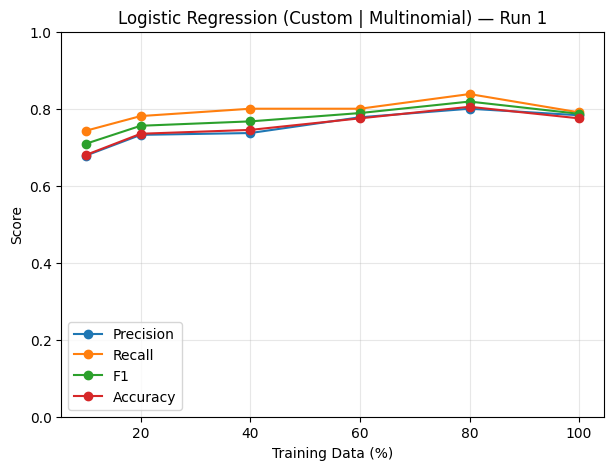

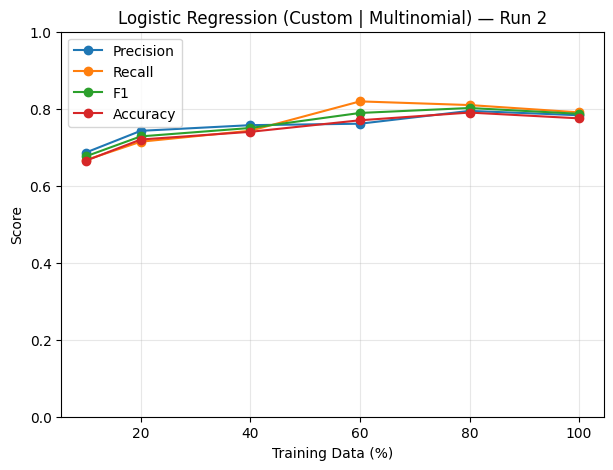

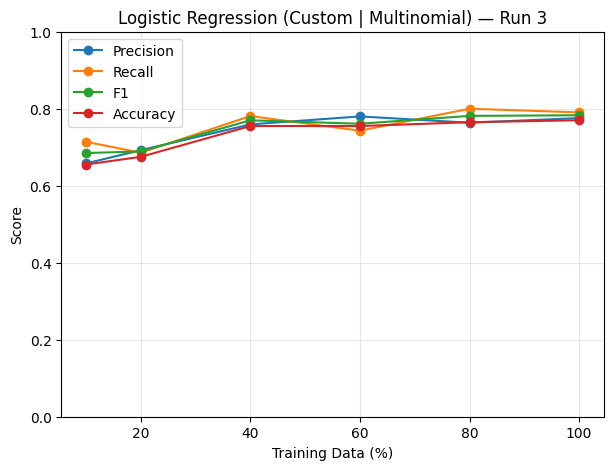

In [69]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)

from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# 可用题目建议的两变量开关
BINARIZED = False               # False=多项式(计数), True=二值
USE_COUNT_VECTORIZER = False    # False=自实现+DictVectorizer, True=CountVectorizer


# 单次训练-评估（返回 P/R/F1/Acc），按百分比抽子集
def train_eval_lr(percent, use_cv=False, binary=False, seed=1):
    sub_X, sub_y = sutils.take_percent(train_X, train_y, percent, shuffle=True, seed=seed)
    if use_cv:
        # 用 CV 向量化；dev 用相同 vocabulary
        Xtr, vec = vectorize_cv(sub_X, binary=binary)
        Xdv, _   = vectorize_cv(dev_X, binary=binary, vocabulary=vec.vocabulary_)
    else:
        # 用自实现向量化；dev 用同一 DictVectorizer 词表
        Xtr, dv = vectorize_custom(sub_X, vocab, binary=binary)
        dev_feats = sutils.featurize(vocab, dev_X, binary=binary)
        Xdv = dv.transform(dev_feats)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(Xtr, sub_y)
    probs = clf.predict_proba(Xdv)[:, 1]
    preds = (probs >= 0.5).astype(int).tolist()
    return sutils.get_prfa(dev_y, preds)  # (P,R,F1,Acc)

# 画图（含 10%）
# 设定不同的训练数据百分比
percents = [10, 20, 40, 60, 80, 100]
# history code
# for p in percents:
#     pr, rc, f1, acc = train_eval_lr(p, use_cv=USE_COUNT_VECTORIZER, binary=BINARIZED, seed=1)
#     P.append(pr); R.append(rc); F1.append(f1); A.append(acc)

# plt.figure(figsize=(7,5))
# plt.plot(percents, P,  marker='o', label='Precision')
# plt.plot(percents, R,  marker='o', label='Recall')
# plt.plot(percents, F1, marker='o', label='F1')
# plt.plot(percents, A,  marker='o', label='Accuracy')
# plt.xlabel('Training Data (%)')
# plt.ylabel('Score')
# plt.ylim(0.0, 1.0)
# title = f"Logistic Regression ({'CountVectorizer' if USE_COUNT_VECTORIZER else 'Custom'} | {'Binarized' if BINARIZED else 'Multinomial'}) — Run 1"
# plt.title(title)
# plt.legend()
# plt.grid(True, alpha=0.3)
# # 如需保存图像（用于 Task 5），取消下一行注释并改文件名避免覆盖
# plt.savefig("LogReg_custom-multinomial_run1.png", bbox_inches='tight', dpi=140)
# plt.show()
for run_num in range(1, 4):  # 执行三次不同的训练
    # 保存每次运行的指标结果
    P, R, F1, A = [], [], [], []
    for p in percents:
        pr, rc, f1, acc = train_eval_lr(p, use_cv=USE_COUNT_VECTORIZER, binary=BINARIZED, seed=run_num)
        P.append(pr)
        R.append(rc)
        F1.append(f1)
        A.append(acc)

    # 画图
    plt.figure(figsize=(7, 5))
    plt.plot(percents, P, marker='o', label='Precision')
    plt.plot(percents, R, marker='o', label='Recall')
    plt.plot(percents, F1, marker='o', label='F1')
    plt.plot(percents, A, marker='o', label='Accuracy')
    
    plt.xlabel('Training Data (%)')
    plt.ylabel('Score')
    plt.ylim(0.0, 1.0)
    plt.title(f"Logistic Regression ({'CountVectorizer' if USE_COUNT_VECTORIZER else 'Custom'} | {'Binarized' if BINARIZED else 'Multinomial'}) — Run {run_num}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 保存图像文件
    plt.savefig(f"LogReg_custom-multinomial_run{run_num}.png", bbox_inches='tight', dpi=140)
    # plt.close()
# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# NOTE : make sure one of your experiments uses 10% of the data, you will need this to answer the first question in task 5
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels


In [70]:
combos = [
    ('custom-multinomial', False, False),
    ('cv-multinomial',     True,  False),
    ('custom-binarized',   False, True),
    ('cv-binarized',       True,  True),
]
for name, use_cv, binary in combos:
    _, _, f1, _ = train_eval_lr(100, use_cv=use_cv, binary=binary, seed=1)
    print(f"{name}: F1={f1:.4f}")


custom-multinomial: F1=0.7867
cv-multinomial: F1=0.7963
custom-binarized: F1=0.7887
cv-binarized: F1=0.8203


Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
- your vectorized features, multinomial: F1=0.7867
- CountVectorizer features, multinomial: F1=0.7963
- your vectorized features, binarized: F1=0.7887
- CountVectorizer features, binarized: F1=0.8203

Produce your graph(s) for the combination with the best final f1 score.


